# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import baricentric as bar
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate, splev, splrep

In [2]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i] * x ** i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


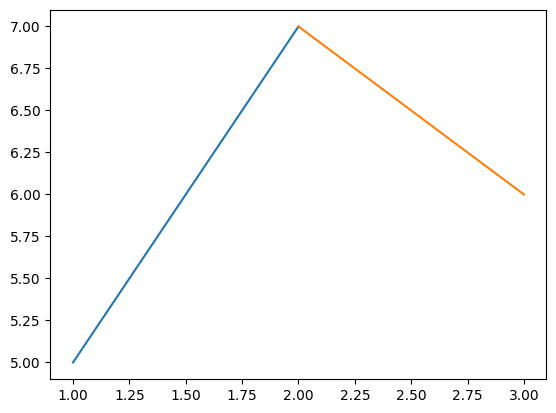

In [3]:
x = np.array([1, 2, 3])
y = np.array([5, 7, 6])

a, b = main.first_spline(x, y)
f = [[b[i], a[i]] for i in range(len(a))]

for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i + 1], 1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


In [4]:
f2 = lambda x: 1 / (25 * x ** 2 + 1)
x2 = np.linspace(-1, 1, 1000)
y2 = f2(x2)

n = [5, 10, 50, 100, 200, 500, 1000, 5000]
l_splprep = np.zeros(len(n))
l_fspline = np.zeros(len(n))
l_bar = np.zeros(len(n))

for inx, val in enumerate(n):
    xi = np.linspace(-1, 1, val)
    yi = f2(xi)

    x_c = bar.chebyshev_nodes(int(val))
    y_c = f2(x_c)

    bar_inter = barycentric_interpolate(x_c, y_c, x2)

    spl = splrep(xi, yi)
    p = splev(np.linspace(-1, 1, 1000), spl)

    a, b = main.first_spline(xi, yi)
    f_s = [[b[i], a[i]] for i in range(len(a))]

    f_spline = np.array([])
    x_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        x_spline = np.append(x_spline, x_new)
        f_spline = np.append(f_spline, PolyCoefficients(x_new, f_s[i]))

    l_splprep[inx] = bar.L_inf(p, y2)
    l_fspline[inx] = bar.L_inf(f_spline, f2(x_spline))
    l_bar[inx] = bar.L_inf(bar_inter, y2)

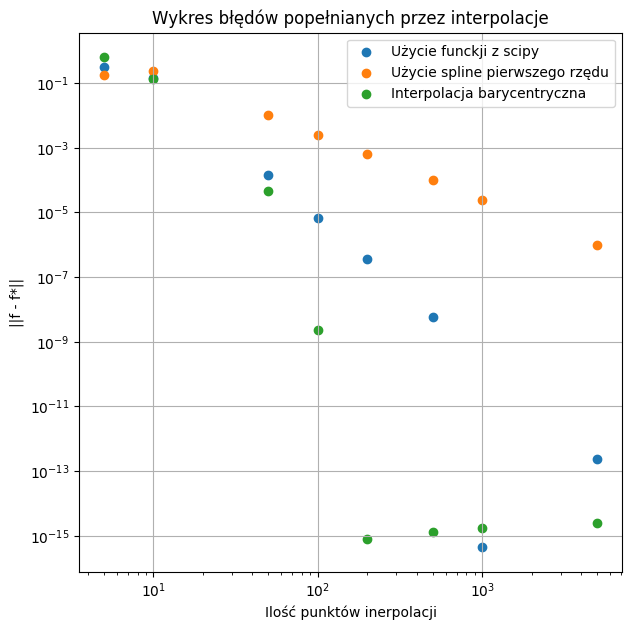

In [5]:
fig1, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_splprep, label='Użycie funckji z scipy')
ax.scatter(n, l_fspline, label='Użycie spline pierwszego rzędu')
ax.scatter(n, l_bar, label='Interpolacja barycentryczna')
ax.set(xscale='log', yscale='log')
ax.set(xlabel='Ilość punktów inerpolacji', ylabel='||f - f*||')
ax.set_title('Wykres błędów popełnianych przez interpolacje')
ax.legend()
ax.grid()

***Zadanie 3.***
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


In [6]:
f3 = lambda x: np.cos(x) * x ** 4
x3 = np.linspace(-1, 1, 1000)
y3 = f3(x3)

n = [5, 10, 50, 100, 200, 500, 1000, 5000]

l_splprep = np.zeros(len(n))
l_fspline = np.zeros(len(n))
l_bar = np.zeros(len(n))

for inx, val in enumerate(n):
    xi = np.linspace(-1, 1, val)
    yi = f3(xi)

    x_c = bar.chebyshev_nodes(int(val))
    y_c = f3(x_c)

    bar_inter = barycentric_interpolate(x_c, y_c, x3)

    spl = splrep(xi, yi)
    p = splev(np.linspace(-1, 1, 1000), spl)

    a, b = main.first_spline(xi, yi)
    f_s = [[b[i], a[i]] for i in range(len(a))]

    f_spline = np.array([])
    x_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        x_spline = np.append(x_spline, x_new)
        f_spline = np.append(f_spline, PolyCoefficients(x_new, f_s[i]))

    l_splprep[inx] = bar.L_inf(p, y3)
    l_fspline[inx] = bar.L_inf(f_spline, f3(x_spline))
    l_bar[inx] = bar.L_inf(bar_inter, y3)

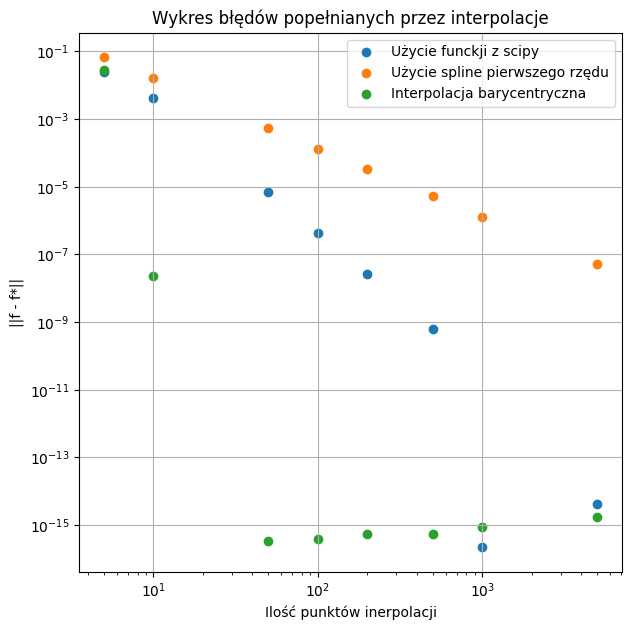

In [7]:
fig2, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_splprep, label='Użycie funckji z scipy')
ax.scatter(n, l_fspline, label='Użycie spline pierwszego rzędu')
ax.scatter(n, l_bar, label='Interpolacja barycentryczna')
ax.set(xscale='log', yscale='log')
ax.set(xlabel='Ilość punktów inerpolacji', ylabel='||f - f*||')
ax.set_title('Wykres błędów popełnianych przez interpolacje')
ax.legend()
ax.grid()

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


In [8]:
def cubcoef(x, x0, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i] * (x - x0) ** i
    return y

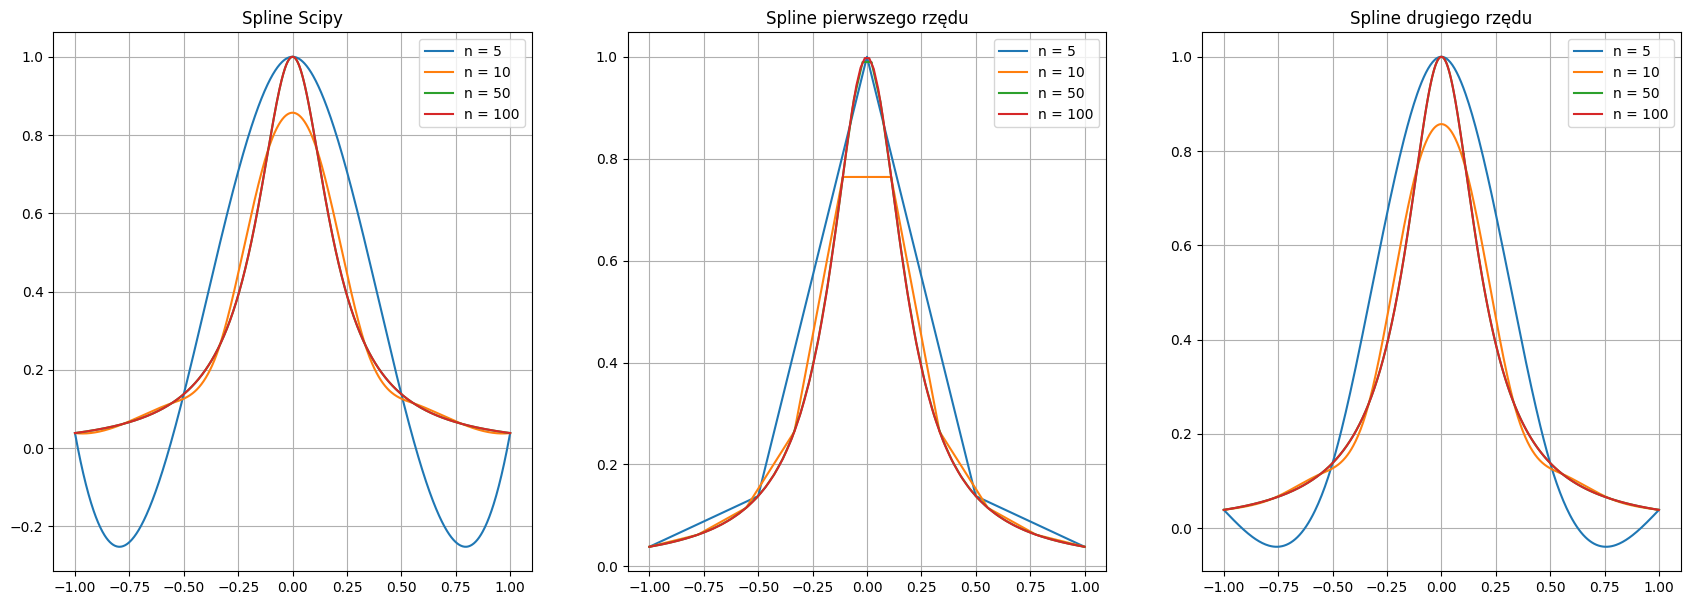

In [9]:
f5 = lambda x: 1 / (25 * x ** 2 + 1)
x5 = np.linspace(-1, 1, 1000)
y5 = f5(x5)

n = [5, 10, 50, 100]

l_splprep = np.zeros(len(n))
l_fspline = np.zeros(len(n))
l_cspline = np.zeros(len(n))

fig3, (sp, s, cs) = plt.subplots(1, 3, figsize=(21, 7))

for inx, val in enumerate(n):
    xi = np.linspace(-1, 1, val)
    yi = f5(xi)

    spl = splrep(xi, yi)
    p = splev(np.linspace(-1, 1, 1000), spl)

    a, b = main.first_spline(xi, yi)
    f_s = [[b[i], a[i]] for i in range(len(a))]

    f_spline = np.array([])
    x_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        x_spline = np.append(x_spline, x_new)
        f_spline = np.append(f_spline, PolyCoefficients(x_new, f_s[i]))

    d, e, f = main.cubic_spline(xi, yi)
    f_cs = [[yi[i], d[i], e[i], f[i]] for i in range(len(d))]

    fc_spline = np.array([])
    xc_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        xc_spline = np.append(xc_spline, x_new)
        fc_spline = np.append(fc_spline, cubcoef(x_new, xi[i], f_cs[i]))

    l_splprep[inx] = bar.L_inf(p, y5)
    l_fspline[inx] = bar.L_inf(f_spline, f5(x_spline))
    l_cspline[inx] = bar.L_inf(fc_spline, f5(xc_spline))

    sp.plot(x5, p, label=f'n = {val}')
    s.plot(x_spline, f_spline, label=f'n = {val}')
    cs.plot(xc_spline, fc_spline, label=f'n = {val}')

sp.set_title('Spline Scipy')
sp.legend()
sp.grid()

s.set_title('Spline pierwszego rzędu')
s.legend()
s.grid()

cs.set_title('Spline drugiego rzędu')
cs.legend()
cs.grid()

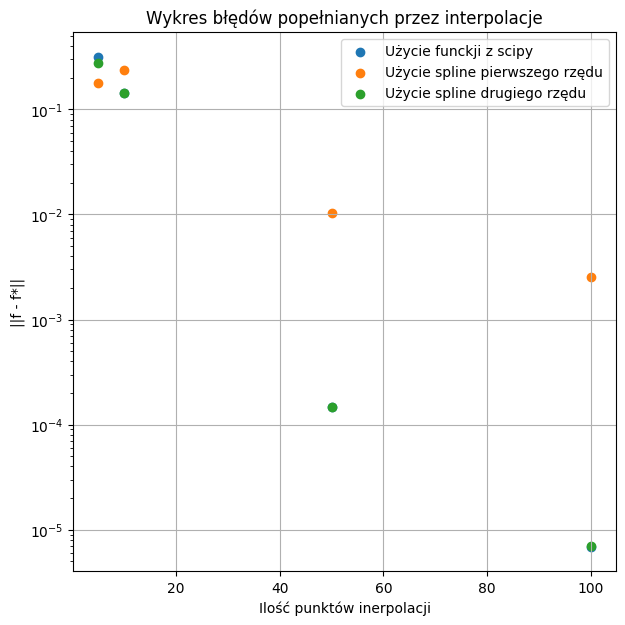

In [10]:
fig4, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_splprep, label='Użycie funckji z scipy')
ax.scatter(n, l_fspline, label='Użycie spline pierwszego rzędu')
ax.scatter(n, l_cspline, label='Użycie spline drugiego rzędu')
ax.set(yscale='log')
ax.set(xlabel='Ilość punktów inerpolacji', ylabel='||f - f*||')
ax.set_title('Wykres błędów popełnianych przez interpolacje')
ax.legend()
ax.grid()

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


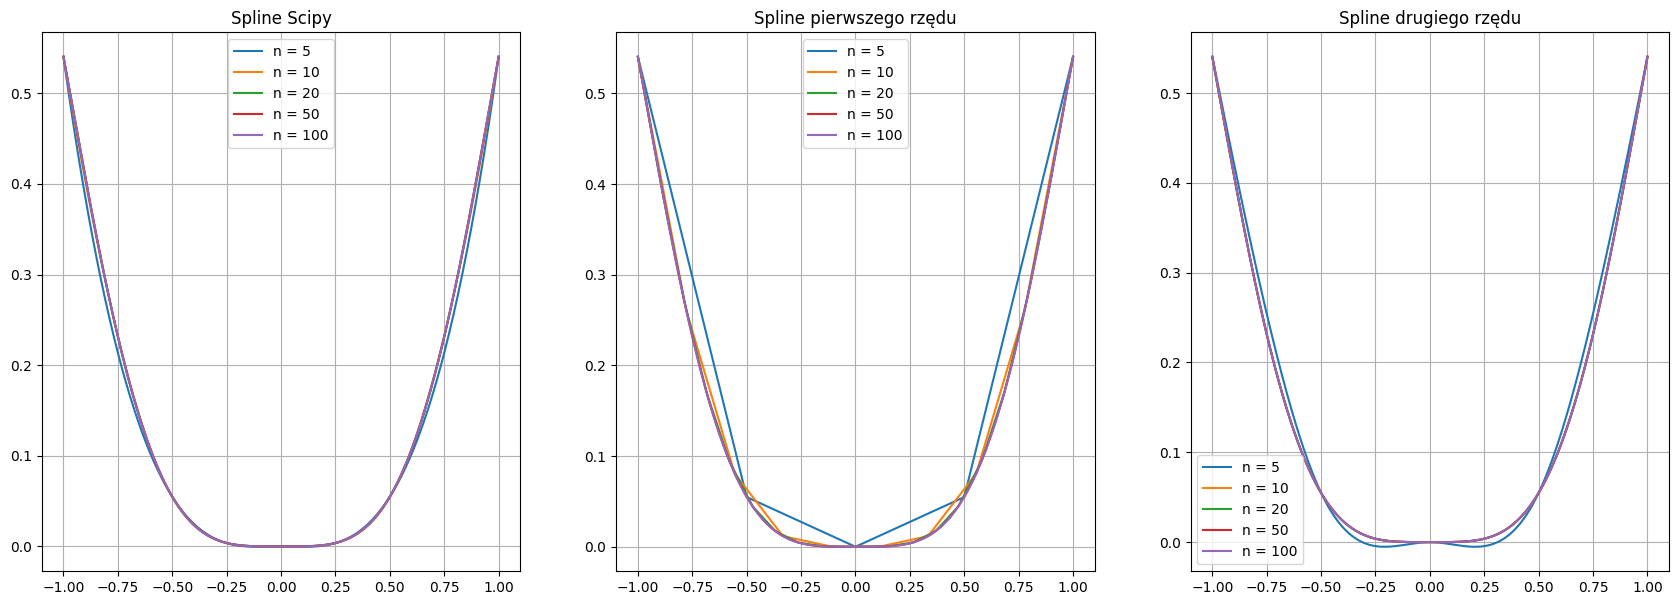

In [11]:
f6 = lambda x: np.cos(x) * x ** 4
x6 = np.linspace(-1, 1, 1000)
y6 = f6(x6)

n = [5, 10, 20, 50, 100]

l_splprep = np.zeros(len(n))
l_fspline = np.zeros(len(n))
l_cspline = np.zeros(len(n))

fig5, (sp, s, cs) = plt.subplots(1, 3, figsize=(21, 7))

for inx, val in enumerate(n):
    xi = np.linspace(-1, 1, val)
    yi = f6(xi)

    spl = splrep(xi, yi)
    p = splev(np.linspace(-1, 1, 1000), spl)

    a, b = main.first_spline(xi, yi)
    f_s = [[b[i], a[i]] for i in range(len(a))]

    f_spline = np.array([])
    x_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        x_spline = np.append(x_spline, x_new)
        f_spline = np.append(f_spline, PolyCoefficients(x_new, f_s[i]))

    d, e, f = main.cubic_spline(xi, yi)
    f_cs = [[yi[i], d[i], e[i], f[i]] for i in range(len(d))]

    fc_spline = np.array([])
    xc_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        xc_spline = np.append(xc_spline, x_new)
        fc_spline = np.append(fc_spline, cubcoef(x_new, xi[i], f_cs[i]))

    l_splprep[inx] = bar.L_inf(p, y6)
    l_fspline[inx] = bar.L_inf(f_spline, f6(x_spline))
    l_cspline[inx] = bar.L_inf(fc_spline, f6(xc_spline))

    sp.plot(x6, p, label=f'n = {val}')
    s.plot(x_spline, f_spline, label=f'n = {val}')
    cs.plot(xc_spline, fc_spline, label=f'n = {val}')

sp.set_title('Spline Scipy')
sp.legend()
sp.grid()

s.set_title('Spline pierwszego rzędu')
s.legend()
s.grid()

cs.set_title('Spline drugiego rzędu')
cs.legend()
cs.grid()

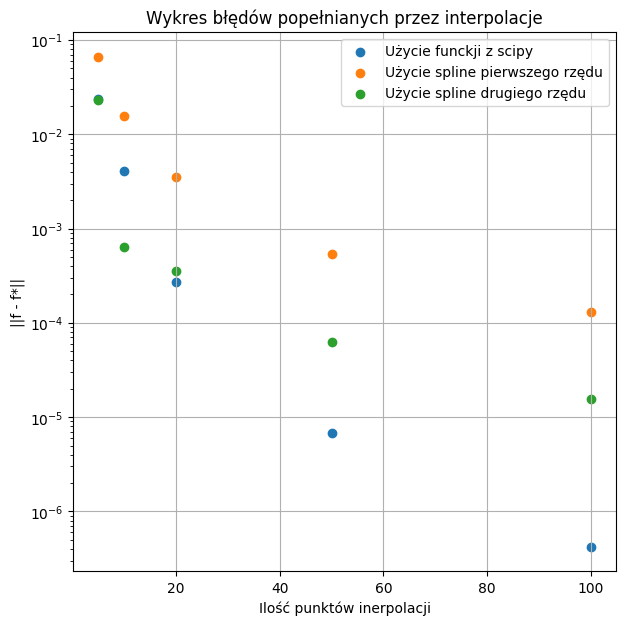

In [12]:
fig6, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_splprep, label='Użycie funckji z scipy')
ax.scatter(n, l_fspline, label='Użycie spline pierwszego rzędu')
ax.scatter(n, l_cspline, label='Użycie spline drugiego rzędu')
ax.set(yscale='log')
ax.set(xlabel='Ilość punktów inerpolacji', ylabel='||f - f*||')
ax.set_title('Wykres błędów popełnianych przez interpolacje')
ax.legend()
ax.grid()

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

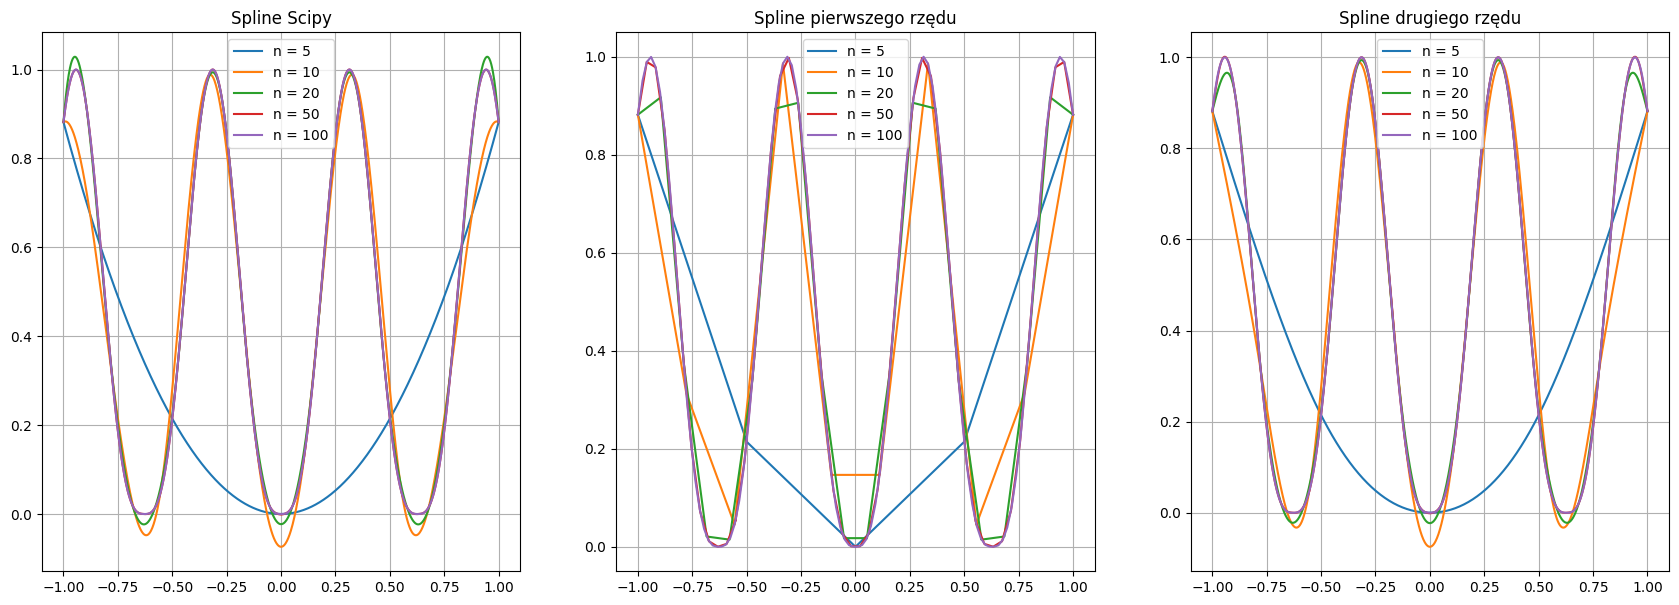

In [13]:
f7 = lambda x: abs(np.sin(5 * x)) ** 3
x7 = np.linspace(-1, 1, 1000)
y7 = f7(x7)

n = [5, 10, 20, 50, 100]

l_splprep = np.zeros(len(n))
l_fspline = np.zeros(len(n))
l_cspline = np.zeros(len(n))

fig7, (sp, s, cs) = plt.subplots(1, 3, figsize=(21, 7))

for inx, val in enumerate(n):
    xi = np.linspace(-1, 1, val)
    yi = f7(xi)

    spl = splrep(xi, yi)
    p = splev(np.linspace(-1, 1, 1000), spl)

    a, b = main.first_spline(xi, yi)
    f_s = [[b[i], a[i]] for i in range(len(a))]

    f_spline = np.array([])
    x_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        x_spline = np.append(x_spline, x_new)
        f_spline = np.append(f_spline, PolyCoefficients(x_new, f_s[i]))

    d, e, f = main.cubic_spline(xi, yi)
    f_cs = [[yi[i], d[i], e[i], f[i]] for i in range(len(d))]

    fc_spline = np.array([])
    xc_spline = np.array([])

    for i in range(len(xi) - 1):
        x_new = np.linspace(xi[i], xi[i + 1], 100)
        xc_spline = np.append(xc_spline, x_new)
        fc_spline = np.append(fc_spline, cubcoef(x_new, xi[i], f_cs[i]))

    l_splprep[inx] = bar.L_inf(p, y7)
    l_fspline[inx] = bar.L_inf(f_spline, f7(x_spline))
    l_cspline[inx] = bar.L_inf(fc_spline, f7(xc_spline))

    sp.plot(x7, p, label=f'n = {val}')
    s.plot(x_spline, f_spline, label=f'n = {val}')
    cs.plot(xc_spline, fc_spline, label=f'n = {val}')

sp.set_title('Spline Scipy')
sp.legend()
sp.grid()

s.set_title('Spline pierwszego rzędu')
s.legend()
s.grid()

cs.set_title('Spline drugiego rzędu')
cs.legend()
cs.grid()

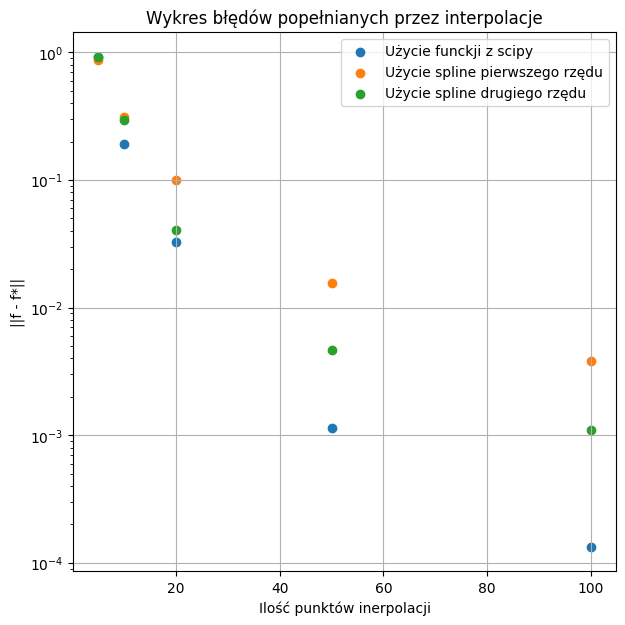

In [14]:
fig8, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_splprep, label='Użycie funckji z scipy')
ax.scatter(n, l_fspline, label='Użycie spline pierwszego rzędu')
ax.scatter(n, l_cspline, label='Użycie spline drugiego rzędu')
ax.set(yscale='log')
ax.set(xlabel='Ilość punktów inerpolacji', ylabel='||f - f*||')
ax.set_title('Wykres błędów popełnianych przez interpolacje')
ax.legend()
ax.grid()

<br>***Wnioski***</br>
Interpolacja przy pomocy funkcji sklejanych nie jest aż tak dokładna jak użycie interpolacji barycentrycznej czy funkcji z pakietu scipy. Z przedstawionych wykresów można wywnioskować, że wraz ze wzrostem ilości węzłów interpolacji zwiększa się dokładność odwzorowania funkcji. Im więcej punktów interpolacji tym większa dokładność. Użycie spline pierwszego lub drugiego rzędu ma wpływ na popełniany błąd. Wybór rzędu funkcji sklejanej powinien zależeć od postaci funkcji którą chcemy przybliżyć jak i od ilości węzłów interpolacji. W przypadku małej ilości węzłów lepiej skorzystać z funkcji spline drugiego rzędu, natomiast w przypadku większej ilości węzłów mniejszy błąd popełnia spline pierwszego rzędu. Na ogół wydajność funkcji spline pierwszego rzędu jest dużo wyższa niż rzędu drugiego, a jej dokładność dla większej ilości węzłów jest lepsza. Funkcja z pakietu scipy popełnia mniejsze błędy niż funkcje spline zaimplementowane na laboratorium.